In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Load CIFAR-10 Dataset
transform = transforms.Compose([transforms.ToTensor()])
train_data = CIFAR10(root='data', train=True, download=True, transform=transform)
test_data = CIFAR10(root='data', train=False, download=True, transform=transform)

# Step 2: Convert CIFAR-10 Images into Graphs
def image_to_graph(image, label, k=4):
    c, h, w = image.shape
    node_features = image.reshape(c, -1).T  # (num_nodes, channels)
    
    # Creating edges based on spatial neighborhood
    edge_index = []
    for i in range(h * w):
        row, col = divmod(i, w)
        neighbors = [(row + dr, col + dc) for dr in range(-1, 2) for dc in range(-1, 2)
                     if 0 <= row + dr < h and 0 <= col + dc < w and not (dr == 0 and dc == 0)]
        
        for nr, nc in neighbors:
            j = nr * w + nc
            edge_index.append([i, j])
    
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    x = torch.tensor(node_features, dtype=torch.float)
    y = torch.tensor([label], dtype=torch.long)
    return Data(x=x, edge_index=edge_index, y=y)

# Convert images to graphs for train and test datasets
train_graphs = [image_to_graph(image, label) for image, label in train_data]
test_graphs = [image_to_graph(image, label) for image, label in test_data]

# Step 3: Prepare DataLoader
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

# Step 4: Define the GNN Model
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(3, 64)
        self.conv2 = GCNConv(64, 128)
        self.conv3 = GCNConv(128, 256)
        self.fc = nn.Linear(256, 10)
    
    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = global_mean_pool(x, batch)  # Aggregate node features into graph feature
        return self.fc(x)

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNNModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Step 5: Training the Model
def train(model, loader):
    model.train()
    total_loss, correct = 0, 0
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * data.num_graphs
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()
    
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

# Step 6: Evaluating the Model
def test(model, loader):
    model.eval()
    total_loss, correct = 0, 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)
            loss = criterion(out, data.y)
            
            total_loss += loss.item() * data.num_graphs
            pred = out.argmax(dim=1)
            correct += (pred == data.y).sum().item()
    
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

# Training loop
num_epochs = 10
for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = test(model, test_loader)
    print(f"Epoch {epoch}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found

100%|███████████████████████████████████████████████████████████████████████████████| 170M/170M [00:55<00:00, 3.06MB/s]


Extracting data\cifar-10-python.tar.gz to data
Files already downloaded and verified


C:\Users\Sashwat Shukla\AppData\Local\Temp\ipykernel_22492\1075429218.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(node_features, dtype=torch.float)
C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1/10, Train Loss: 2.0620, Train Acc: 0.2204, Test Loss: 2.0263, Test Acc: 0.2300
Epoch 2/10, Train Loss: 1.9960, Train Acc: 0.2561, Test Loss: 1.9682, Test Acc: 0.2661
Epoch 3/10, Train Loss: 1.9736, Train Acc: 0.2710, Test Loss: 1.9559, Test Acc: 0.2724
Epoch 4/10, Train Loss: 1.9554, Train Acc: 0.2782, Test Loss: 1.9471, Test Acc: 0.2796
Epoch 5/10, Train Loss: 1.9442, Train Acc: 0.2858, Test Loss: 1.9273, Test Acc: 0.2924
Epoch 6/10, Train Loss: 1.9341, Train Acc: 0.2877, Test Loss: 1.9160, Test Acc: 0.3025
Epoch 7/10, Train Loss: 1.9245, Train Acc: 0.2945, Test Loss: 1.9162, Test Acc: 0.2989
Epoch 8/10, Train Loss: 1.9186, Train Acc: 0.2988, Test Loss: 1.9033, Test Acc: 0.2956
Epoch 9/10, Train Loss: 1.9116, Train Acc: 0.3013, Test Loss: 1.9238, Test Acc: 0.2937
Epoch 10/10, Train Loss: 1.9071, Train Acc: 0.3020, Test Loss: 1.8960, Test Acc: 0.3058



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found

Files already downloaded and verified
Files already downloaded and verified


C:\Users\Sashwat Shukla\AppData\Local\Temp\ipykernel_14004\2988590392.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(node_features, dtype=torch.float)
C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


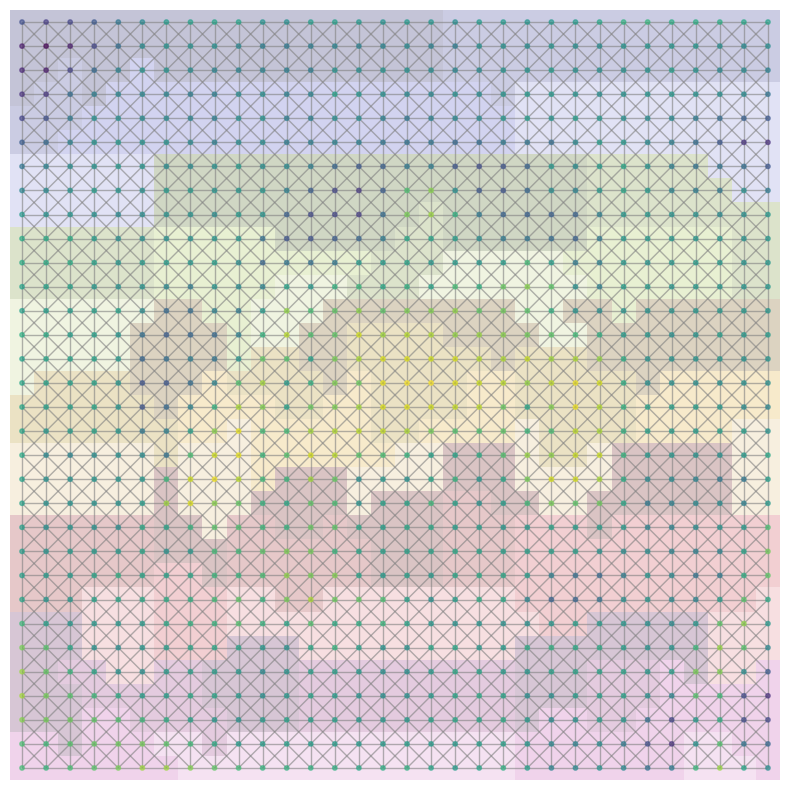

Epoch 1/70, Train Loss: 2.0633, Train Acc: 0.2211, Test Loss: 2.0035, Test Acc: 0.2350
Epoch 2/70, Train Loss: 1.9932, Train Acc: 0.2573, Test Loss: 1.9591, Test Acc: 0.2768
Epoch 3/70, Train Loss: 1.9651, Train Acc: 0.2744, Test Loss: 1.9493, Test Acc: 0.2783
Epoch 4/70, Train Loss: 1.9499, Train Acc: 0.2790, Test Loss: 1.9288, Test Acc: 0.2863
Epoch 5/70, Train Loss: 1.9397, Train Acc: 0.2867, Test Loss: 1.9277, Test Acc: 0.2826
Epoch 6/70, Train Loss: 1.9298, Train Acc: 0.2912, Test Loss: 1.9117, Test Acc: 0.2946
Epoch 7/70, Train Loss: 1.9236, Train Acc: 0.2944, Test Loss: 1.9289, Test Acc: 0.2935
Epoch 8/70, Train Loss: 1.9158, Train Acc: 0.2976, Test Loss: 1.9021, Test Acc: 0.2966
Epoch 9/70, Train Loss: 1.9096, Train Acc: 0.3029, Test Loss: 1.9005, Test Acc: 0.3055
Epoch 10/70, Train Loss: 1.9065, Train Acc: 0.3020, Test Loss: 1.9082, Test Acc: 0.3004
Epoch 11/70, Train Loss: 1.9017, Train Acc: 0.3073, Test Loss: 1.8919, Test Acc: 0.3066
Epoch 12/70, Train Loss: 1.8968, Train Ac

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from skimage.segmentation import slic
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from sklearn.metrics import adjusted_rand_score

# Step 1: Load CIFAR-10 Dataset
transform = transforms.Compose([transforms.ToTensor()])
train_data = CIFAR10(root='data', train=True, download=True, transform=transform)
test_data = CIFAR10(root='data', train=False, download=True, transform=transform)

# Step 2: Convert CIFAR-10 Images into Graphs
def image_to_graph(image, label, k=4):
    c, h, w = image.shape
    node_features = image.reshape(c, -1).T  # (num_nodes, channels)
    
    # Creating edges based on spatial neighborhood
    edge_index = []
    for i in range(h * w):
        row, col = divmod(i, w)
        neighbors = [(row + dr, col + dc) for dr in range(-1, 2) for dc in range(-1, 2)
                     if 0 <= row + dr < h and 0 <= col + dc < w and not (dr == 0 and dc == 0)]
        
        for nr, nc in neighbors:
            j = nr * w + nc
            edge_index.append([i, j])
    
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    x = torch.tensor(node_features, dtype=torch.float)
    y = torch.tensor([label], dtype=torch.long)
    return Data(x=x, edge_index=edge_index, y=y)

# Convert images to graphs for train and test datasets
train_graphs = [image_to_graph(image, label) for image, label in train_data]
test_graphs = [image_to_graph(image, label) for image, label in test_data]

# Step 3: Prepare DataLoader
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

# Step 4: Superpixel Generation
def generate_superpixels(image, n_segments=100):
    """
    Generate superpixels for an image using SLIC segmentation.
    """
    segments = slic(image.permute(1, 2, 0).numpy(), n_segments=n_segments, compactness=10, sigma=1)
    return segments

# Step 5: Visualize Image as a Graph and Superpixels
def visualize_image_graph(image, superpixels, edge_index):
    """
    Visualize the graph created from the image and superpixels.
    """
    c, h, w = image.shape
    num_nodes = h * w

    # Create a networkx graph to visualize the image as a graph
    G = nx.Graph()

    # Add nodes
    for i in range(num_nodes):
        row, col = divmod(i, w)
        G.add_node(i, pos=(col, row), color=image[0, row, col].item())

    # Add edges
    for edge in edge_index.t().tolist():
        G.add_edge(edge[0], edge[1])

    # Create a plot for the graph
    fig, ax = plt.subplots(figsize=(10, 10))  # Create a figure and axis
    
    # Set positions for the nodes (as pixel coordinates)
    pos = nx.get_node_attributes(G, 'pos')

    # Get the node colors (based on the image's pixel values)
    node_colors = [G.nodes[n]['color'] for n in G.nodes()]

    # Draw the graph using NetworkX within the created axis
    nx.draw(G, pos, node_size=10, node_color=node_colors, edge_color="gray", with_labels=False, alpha=0.6, ax=ax)

    # Overlay superpixel regions
    ax.imshow(superpixels, cmap='tab20b', alpha=0.3)  # Overlay the superpixels in semi-transparent mode

    # Show the plot
    ax.axis('off')  # Optional: Turn off axis for cleaner visualization
    plt.show()

# Example: Visualize an Image, its Graph, and Superpixels
sample_image, sample_label = train_data[0]
sample_image = sample_image.unsqueeze(0)  # Add batch dimension
superpixels = generate_superpixels(sample_image[0])  # Use only the first channel (RGB -> grayscale)

# Convert image to graph
sample_graph = image_to_graph(sample_image[0], sample_label)
visualize_image_graph(sample_image[0], superpixels, sample_graph.edge_index)

# Step 6: Define the GNN Model
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(3, 64)
        self.conv2 = GCNConv(64, 128)
        self.conv3 = GCNConv(128, 256)
        self.fc = nn.Linear(256, 10)
    
    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = global_mean_pool(x, batch)  # Aggregate node features into graph feature
        return self.fc(x)

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNNModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Step 7: Training the Model
def train(model, loader):
    model.train()
    total_loss, correct = 0, 0
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() * data.num_graphs
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()
    
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

# Step 8: Evaluating the Model
def test(model, loader):
    model.eval()
    total_loss, correct = 0, 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)
            loss = criterion(out, data.y)
            
            total_loss += loss.item() * data.num_graphs
            pred = out.argmax(dim=1)
            correct += (pred == data.y).sum().item()
    
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

# Training loop
num_epochs = 70
for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = test(model, test_loader)
    print(f"Epoch {epoch}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

